In [ ]:
from os import path
import numpy as np
import cv2
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import tensorflow as tf
tf.test.gpu_device_name()
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#import model from keras
import keras
from keras.models import Model
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, BatchNormalization
from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input
from keras.applications.resnet import preprocess_input
from keras import Sequential

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = ''
# read iris.csv
legend = pd.read_csv(path + 'legend.csv').to_numpy()

# split into label and identifiers
tmp_labels = legend[:, 2]
tmp_pic_names = legend[:, 1]
tmp_labels = np.array([i.lower() for i in tmp_labels])
print(tmp_pic_names.shape)

(13690,)


In [ ]:
import os
from shutil import copyfile

name_tv, name_test, label_tv, label_test = train_test_split(tmp_pic_names, tmp_labels, test_size=0.3, random_state=0)

name_train, name_val, label_train, label_val = train_test_split(name_tv, label_tv, test_size=0.2, random_state=0)

#Training Data Prep
folder = 'training_data/'
original_folder = 'images/'

#making the training folder
os.mkdir(folder)

for index in range(len(name_train)):
    folder_name = folder + label_train[index]
    orig_file_name = original_folder + name_train[index]
    new_file_name = folder_name + '/' + name_train[index]

    if os.path.exists(folder_name):
      copyfile(orig_file_name, new_file_name)
    else:
      os.mkdir(folder_name)

#val Data Prep
folder = 'val_data/'
original_folder = 'images/'

#making the val folder
os.mkdir(folder)

for index in range(len(name_train)):
    folder_name = folder + label_train[index]
    orig_file_name = original_folder + name_train[index]
    new_file_name = folder_name + '/' + name_train[index]

    if os.path.exists(folder_name):
      copyfile(orig_file_name, new_file_name)
    else:
      os.mkdir(folder_name)


#Test Data Prep
folder = 'testing_data/'
original_folder = 'images/'

#making the training folder
os.mkdir(folder)

for index in range(len(name_test)):
    folder_name = folder + label_test[index]
    orig_file_name = original_folder + name_test[index]
    new_file_name = folder_name + '/' + name_test[index]

    if os.path.exists(folder_name):
      copyfile(orig_file_name, new_file_name)
    else:
      os.mkdir(folder_name)


In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
#InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128,3))


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
augment_generator = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.3,
                             horizontal_flip = True,
                             preprocessing_function=preprocess_input)

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = augment_generator.flow_from_directory('training_data', target_size = (256,256),batch_size=32)
val_flow = augment_generator.flow_from_directory('val_data', target_size = (256,256),batch_size=32)
test_flow = data_generator.flow_from_directory('testing_data', target_size = (256,256),batch_size=32)

Found 7657 images belonging to 8 classes.
Found 7657 images belonging to 8 classes.
Found 4098 images belonging to 8 classes.


In [ ]:
CLASSES = 8
print('Classes:', CLASSES)

model = Sequential()
model.add(resnet_model)
#model.add(InceptionV3_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(CLASSES, activation='softmax'))

for layer in resnet_model.layers:
    #if isinstance(layer, BatchNormalization):
        #layer.trainable = True
    #else:
    layer.trainable = False

Classes: 8


In [ ]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start_time = time.time()
EPOCHS = 1000
STEPS_PER_EPOCH = 2

history = model.fit(
    train_flow,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data = val_flow,
    validation_steps = 2,
)
  
print(f"Time consumed for {EPOCHS} epochs: {(time.time() - start_time )/60 // 0.01 * 0.01} mins")

Epoch 1/1000
2/2 [==============================] - 2s 1s/step - loss: 0.8244 - accuracy: 0.6406 - val_loss: 0.6304 - val_accuracy: 0.7188
Epoch 2/1000
2/2 [==============================] - 2s 1s/step - loss: 0.7141 - accuracy: 0.7500 - val_loss: 0.7486 - val_accuracy: 0.6875
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 0.6087 - accuracy: 0.7344 - val_loss: 0.6194 - val_accuracy: 0.7656
Epoch 4/1000
2/2 [==============================] - 2s 1s/step - loss: 0.7025 - accuracy: 0.7188 - val_loss: 0.9004 - val_accuracy: 0.7031
Epoch 5/1000
2/2 [==============================] - 2s 1s/step - loss: 0.6190 - accuracy: 0.7656 - val_loss: 0.6658 - val_accuracy: 0.7500
Epoch 6/1000
2/2 [==============================] - 2s 1s/step - loss: 0.7156 - accuracy: 0.7344 - val_loss: 0.9292 - val_accuracy: 0.6094
Epoch 7/1000
2/2 [==============================] - 2s 1s/step - loss: 0.8513 - accuracy: 0.7344 - val_loss: 0.5152 - val_accuracy: 0.8125
Epoch 8/1000
2/2 [=========

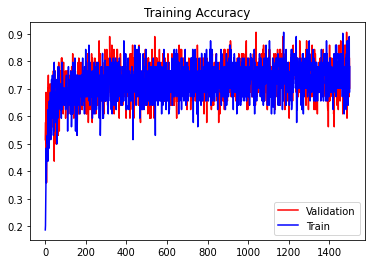

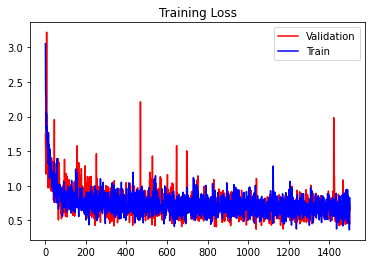

In [ ]:
import matplotlib.pyplot as plt
acc += history.history['accuracy']
loss += history.history['loss']
val_acc += history.history['val_accuracy']
val_loss += history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc,'r', label = 'Validation')
plt.plot(epochs, acc,'b', label = 'Train')
plt.title("Training Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, val_loss,'r', label = 'Validation')
plt.plot(epochs,loss,'b', label = 'Train')
plt.title("Training Loss")

plt.legend()
plt.show()

In [ ]:
model.evaluate(test_flow)

129/129 [==============================] - 17s 135ms/step - loss: 0.6203 - accuracy: 0.7828


[0.6203022599220276, 0.7828208804130554]

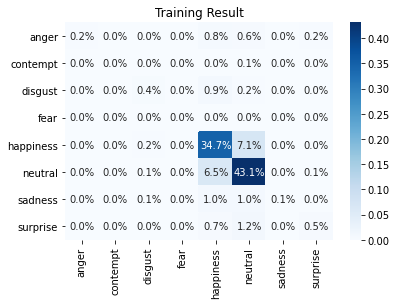

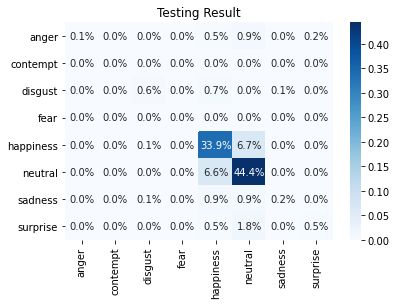

In [ ]:
import seaborn as sns
categories = [i[3:] for i in onehot_encoder.get_feature_names()]
plt.figure(figsize = (6,4))
sns.heatmap(train_cfm/np.sum(train_cfm), annot=True, 
            fmt='.1%', cmap='Blues',xticklabels=categories,yticklabels=categories)
plt.title('Training Result')
plt.show()


plt.figure(figsize = (6,4))
sns.heatmap(test_cfm/np.sum(test_cfm), annot=True, 
            fmt='.1%', cmap='Blues',xticklabels=categories,yticklabels=categories)
plt.title('Testing Result')
plt.show()